In [2]:
import pandas as pd
df = pd.read_csv("/Users/rachel/Desktop/binf5507git/BINF5507/Capstone/arXiv_scientific dataset.csv")
df.head()

,id,title,category,category_code,published_date,updated_date,authors,first_author,summary,summary_word_count
0,cs-9308101v1,Dynamic Backtracking,Artificial Intelligence,cs.AI,8/1/93,8/1/93,['M. L. Ginsberg'],'M. L. Ginsberg',Because of their occasional need to return to ...,79
1,cs-9308102v1,A Market-Oriented Programming Environment and ...,Artificial Intelligence,cs.AI,8/1/93,8/1/93,['M. P. Wellman'],'M. P. Wellman',Market price systems constitute a well-underst...,119
2,cs-9309101v1,An Empirical Analysis of Search in GSAT,Artificial Intelligence,cs.AI,9/1/93,9/1/93,"['I. P. Gent', 'T. Walsh']",'I. P. Gent',We describe an extensive study of search in GS...,167
3,cs-9311101v1,The Difficulties of Learning Logic Programs wi...,Artificial Intelligence,cs.AI,11/1/93,11/1/93,"['F. Bergadano', 'D. Gunetti', 'U. Trinchero']",'F. Bergadano',As real logic programmers normally use cut (!)...,174
4,cs-9311102v1,Software Agents: Completing Patterns and Const...,Artificial Intelligence,cs.AI,11/1/93,11/1/93,"['J. C. Schlimmer', 'L. A. Hermens']",'J. C. Schlimmer',To support the goal of allowing users to recor...,187


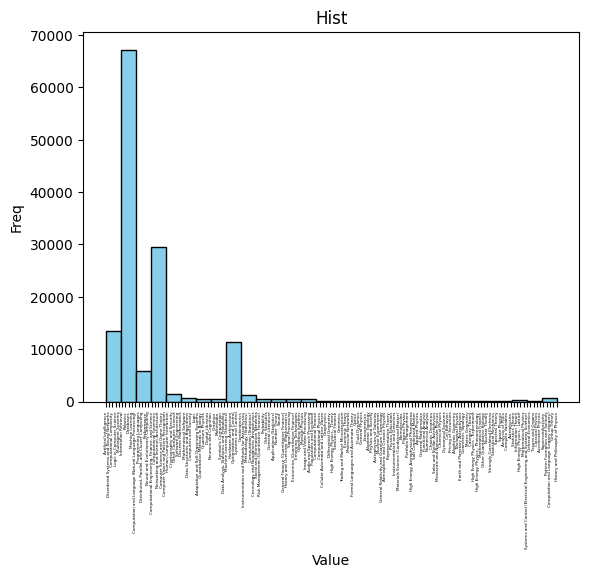

In [5]:
import matplotlib.pyplot as plt
import numpy as np

dataset = df[['title', 'summary', 'category']]


# Create the histogram
plt.hist(dataset['category'], bins=30, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title("Hist")
plt.xlabel("Value")
plt.ylabel("Freq")

plt.xticks(rotation=90, fontsize=3)

# Show the plot
plt.show()


In [8]:
dataset['text'] = dataset['title'] + " " + dataset['summary']

from sklearn.model_selection import train_test_split

# Features (text) and target (category)
X = dataset['text']
y = dataset['category']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

from sklearn.naive_bayes import MultinomialNB

# Initialize and train the model
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = nb_model.predict(X_test_vectorized)

from sklearn.metrics import classification_report, accuracy_score

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


/var/folders/2x/jkbf1_7146v0xqx_m99sdm000000gn/T/ipykernel_99975/3240149600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['text'] = dataset['title'] + " " + dataset['summary']


Accuracy: 0.7052260716382853
                                                                  precision    recall  f1-score   support

                                             Accelerator Physics       0.00      0.00      0.00         1
                          Adaptation and Self-Organizing Systems       0.00      0.00      0.00         7
                                              Algebraic Geometry       0.00      0.00      0.00         1
                                                Analysis of PDEs       0.00      0.00      0.00         2
                                       Applications (Statistics)       0.00      0.00      0.00        54
                                                 Applied Physics       0.00      0.00      0.00         2
                                         Artificial Intelligence       0.62      0.58      0.60      2594
                                                    Astrophysics       0.00      0.00      0.00         2
                

/Users/rachel/miniconda3/envs/capstone_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rachel/miniconda3/envs/capstone_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rachel/miniconda3/envs/capstone_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif